<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Fastai/Notas_de_la_clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 4 - Deep Learning for Coders**

# **Respuestas al cuestionario**

1. **¿Cómo podría el multi-label clasiffication mejorar la usabilidad del clasificador de osos?**

En la clase se mencionan dos ejemplos. 

- ¿Que sucede si en la imagen aparece mas de una categoria de oso? 

- ¿Que sucede si en la imagen no aparece ningun oso? (recordar que esta opcion no se encuentra dentro de las categorias)

2. **¿Cómo codificamos la variable dependiente en un problema de clasificación de etiquetas múltiples?**

Esto lo hacemos con one-hot encoding, es decir, a cada categoria le ponemos un indice, con lo cual, si en la etiqueta nos encontramos con una o mas categorias señaladas, entonces correspondera armar un tensor de un tamaño igual al numero de categorias, luego este contendra UNOS en las posiciones (indices) de las categorias que marca la etiqueta y CEROS en las posiciones que no son marcadas. Asi como muestra el ejemplo a continuacion.

```python
categorias = {'perro', 'gato', 'raton'}

# 1) Le colocamos un indice a cada categoria

dic_categorias = {0:'perro', 1:'gato', 2:'raton'}

# 2) Imaginemos algunas de las etiquetas en los datos

label1 = 'perro gato'
label2 = 'gato'
label3 = 'perro gato raton'

# 3) Siguiendo las reglas del one-hot encoding, estas etiquetas pueden se representadas como:

label1 = [1, 1, 0]
label2 = [0, 1, 0]
label3 = [1, 1, 1]

```


3. **¿Cómo se accede a las filas y columnas de un DataFrame como si fuera una matriz?**

Esto se hace con el metodo `iloc([fila, columna])`.
```python
# Ejemplo
import pandas as pd

lista = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
df = pd.DataFrame(lista)
print(df)
>>    
     1  2  3
     4  5  6
     7  8  9

# Agarrar la primera fila
#df1 = df.iloc[[0]]
#df1 = df.iloc[[0][0:3]]
df1 = df.iloc[[0][:]]
print(df1)
>> 
    1  2  3

# Agarrar la primera columna
df2 = df.iloc[[0][0]]
print(df2)
>> 
    1
    4
    7
```

4. **¿Cómo se obtiene una columna por nombre de un DataFrame?**

Esto se hace de la siguiente manera.

```python
import pandas as pd

lista = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
df = pd.DataFrame(lista, columns=['a', 'b', 'c'])
df1 = df['a']
print(df1)
>>    
     1
     4
     7
```

5. **¿Cuál es la diferencia entre un `Dataset` y un` DataLoader`?**

- **Dataset**: Contiene los datos, incluyendo la separacion de estos entre training set y validation set.
- **Dataloaders**: Estos requieren de un Dataset, con lo cual este objeto, luego es capaz de cargar los datos y generar los mini-batch para el modelo.

6. **¿Qué contiene normalmente un objeto "Dataset"?**

Estos normalmente contiene el training set y el validation set.

7. **¿Qué contiene normalmente un objeto "DataLoaders"?**

Estos normalemente arman y contienen los mini-batch en formato de tuplas (con la variable dependiente y la variable independiente)

8. **¿Qué hace `lambda` en Python?**

`lambda` sirve para ejecutar un proceso sin definir una funcion previa. (ojo que esta funcion no quedara guardada)

```python
# ejemplo
def x2(x):
  return 2*x

datos = [1, 2, 3, 4, 5]

# Opcion 1 (sin lambda)
salida = [x2(i) for i in datos]
print(salida)
>> [2, 4, 6, 8, 10]

# Opcion 2 (con lambda)
x_lambda = lambda i: 2*i
salida2 = [x_lambda(i) for i in datos]
print(salida2)
>> [2, 4, 6, 8, 10]
```

9. **¿Cuáles son los métodos para personalizar cómo se crean las variables independientes y dependientes con la API del bloque de datos?**

Por ejemplo, estas son `ImageBlock`, `CategoricalBlock` y `MultiCategoryBlock`. Estas se utilizan en `DataBlock(blocks)`.

10. **¿Por qué softmax no es una función de activación de salida adecuada cuando se utiliza un one-hot encoding?**

La razon es que la softmax regresa un unico valor para cada categoria, haciendo una prediccion con valores entre 0 y 1. De esta manera, si quisieramos utilizar la softmax como normalmente se utilizo en la clase anterior, tendriamos que llamar a la etiqueta `perro gato` como una unica categoria, ampliando asi el tamaño del tensor de salida en un numero equivalente a todas las combinaciones entre clasificaciones que se pueden dar.

11. **¿Por qué `nll_loss` no es una función de pérdida apropiada cuando se usa un one-hot encoding?**

La funcion de perdida `nll_loss` es aun menos posible de implementar para este caso. Es decir, si con la softmax aun existe esta posibilidad de generar clasificaciones nuevas (producto de la combinacion de las originales), para el caso de la `nll_loss` esto es imposible, ya que esta se encuentra restringida a trabajar solo para clasificaciones binarias (ES o NO ES).

12. **¿Cuál es la diferencia entre `nn.BCELoss` y` nn.BCEWithLogitsLoss`?**

- `nn.BCELoss` calcula cross entropy en one-hot encoded, pero sin aplicar la funcion sigmoide.
- `nn.BCEWithLogitsLoss` es la misma que la anterior, pero utiliza una sigmoide entre medio.


13. **¿Por qué no podemos utilizar el accuracy que siempre usamos en un problema de etiquetas múltiples?**

Mas abajo lo dejo mejor explicado, pero principalmente sucede porque el accuracy tradicional solo puede colocar un 1 en el puesto donde el valor de la prediccion es mas grande (para hacerlos calzar con la etiqueta) y esto lo hace a traves de la funcion argmax (retorna el indice del valor mas alto). Asi el problema se origina cuando la etiqueta tiene varios 1 es distintas posiciones, ya que el metodo tradicional solo puede poner un 1 es una unica posicion.


14. **¿Cuándo está bien ajustar un hiperparámetro en el conjunto de validación?**

En la clase se da a entender de que si, por ejemplo, generamos una grafica de los aciertos del modelo en funcion de alguno de los hyperparametros, esto no supone ningun riesgo si la curva resultante llega a ser una curva suave o smooth.

15. **¿Cómo se implementa `y_range` en fastai? (¡Vea si puede implementarlo usted mismo y pruébelo sin mirar!)**

Lo que hace el `y_range` es lo siguiente:
```python
import numpy as np

def sigmoid(x):
  salida = (1/(1 + np.exp(-x)))
  return salida

def y_range(x, maximo, minimo):
  salida = sigmoid(x)*(maximo-minimo) + minimo
  return salida

entrada = [10, 14, 1, -1, -10]
salida = round([y_range(entrada[i], 6, -6), 2) for i in range(len(entrada))]
print(salida)
>> [6.0, 6.0, 2.77, -2.77, -6.0]
``` 

16. **¿Qué es un problema de regresión? ¿Qué función de pérdida debería utilizar para tal problema?**

Un problema de regresion se diferencia de uno de clasificacion, ya que, las predicciones se desprenden de un especio continuo, a diferencia de un clasificador, cuyo espacio es segmentado o discreto.

La funcion de perdida que se utiliza para este caso corresponde a MSE_loss, ya que hace sentido ocuparla cuando trabajemos sobre valores continuos.

17. **¿Qué debe hacer para asegurarse de que la biblioteca fastai aplique el mismo aumento de datos a sus imágenes de entrada y las coordenadas de sus puntos de destino?**

Se requiere de especificar lo siguiente:

```python
batch_tfms=[*aug_transforms(size=(240,320)),
            Normalize.from_stats(*imagenet_stats)]
```

# **Multi-label clasification**


## **Preparativos**

In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 8.3 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 46 kB 5.7 MB/s 
     |████████████████████████████████| 188 kB 52.0 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 393 kB/s 


In [ ]:
# Descargamos los datos
path = untar_data(URLs.PASCAL_2007)

In [ ]:
# Armamos un dataframe de los datos y vemos como vienen
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


## **Construyendo un DataBlock**

In [ ]:
# Generamos un datablock vacio
dblock = DataBlock()

In [ ]:
# A este datablock le añadimos los datos
dsets = dblock.datasets(df)

In [ ]:
# Ahora definimos un par de funciones para 
## 1) Extraer las rutas de las imagenes
## 2) Extraer las etiquetas de las imagens

def get_x(r): 
  return path/'train'/r['fname']

def get_y(r): 
  return r['labels'].split(' ')

In [ ]:
# Cargamos los datos con las funciones anteriores y ocupando los bloques de 
# ImageBlock y MultiCategoryBlock
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x332,
 TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# Ahora, si nos fijamos el dataframe del inicio, podremos notar que ya nos dicen 
# que datos ocupar como set de entrenamiento y set de validacion.
# Por esta razon creamos esta tercera funcion y asi destinar los datos a los
# conjuntos donde correspondan

def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y)

dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# Por ultimo, y dado que estamos trabajando con imagenes, tenemos que aplicar
# al menos una transformacion al tamaño de las imagenes
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

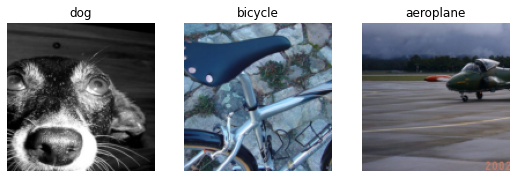

In [ ]:
# Observemos las imagens cargadas
dls.show_batch(nrows=1, ncols=3)

## **Binary cross entropy**

In [ ]:
# Ahora generemos un 'learner'
## Para esto necesito:
## 1) un DataLoader (listo)
## 2) un modelo de red neuronal (este primero lo descargamos y lo ponemos)
## 3) un optimizador (si no se especifica, utiliza por defecto SGD)
## 4) una funcion de perdida (ES LO QUE NOS ESTA FALTANDO)

learn = cnn_learner(dls, resnet18)

# De aqui sacamos un mini-batch del DataLoader (feature, target)
x,y = to_cpu(dls.train.one_batch())

# Aqui hacemos pasar el mini-batch (size=64, por defecto) por el modelo
activs = learn.model(x)

# Veamos las dimensiones del tensor de salida
activs.shape

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([64, 20])

In [ ]:
# Ahora definimos la funcion de perdida que vamos a utilzar para este caso
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs, y)
loss

TensorMultiCategory(1.0481, grad_fn=<AliasBackward>)

In [ ]:
# Aqui cargamos el modelo y lo dejamos entrenando un rato
## OJO: si en el DataBlock especificamos MultiCategoryBlock para el target, entonces
## nuestro learner utilizara por defecto la funcion de perdida nn.BCEWithLogitsLoss

## Notar que cambiamos la metrica que estamos utilizando. (MAS ABAJO DEJO EXPLICADO PORQUE)
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.938551,0.687606,0.245956,00:28
1,0.823475,0.557322,0.295060,00:28
2,0.601900,0.204740,0.808566,00:28
3,0.359093,0.124876,0.939163,00:28


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.134006,0.119498,0.945697,00:29
1,0.117211,0.108293,0.951972,00:29
2,0.098239,0.104043,0.951813,00:29


Esta es la metrica del accuracy:
```python
def accuracy(inp, targ, axis=-1):
    # ejemplo para la primera entrada del mini-batch
    ## inp = [0.8, 0.9, 0.3, 0.4]
    ## pred = [0.0, 1.0, 0.0, 0.0]
    pred = inp.argmax(dim=axis)
    # ahora imaginemos que el target de la primera entrada del mini-batch es
    ## targ = [0.0, 1.0, 0.0, 0.0]
    ## como pred == targ -> True
    ## luego True.float() -> 1.0
    ## por ultimo sumamos todos los aciertos en el mini-batch y calculamos un promedio.
    return (pred == targ).float().mean()
```

Esta es la manera en la que nosotros normalmente calculamos el accuracy, pero si seguimos aplicando esta misma regla, el problema se genera en que el argmax solo selecciona un indice (el mayor), con lo cual funcionará mal si lo utilizamos para targets con mas de una categoria (`[1.0, 0.0, 1.0, 1.0]`, por ejemplo)

De esta manera, nuestra nueva metrica hace pasar la prediccion por una funcion sigmoide y utiliza un umbral o `thresh`, para que los valores por sobre este umbral sean 1.0 y valores bajo este umbral sean 0.0.

```python
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    # La prediccion la hacemos pasa por una sigmoide (valores entre 0 y 1)
    if sigmoid: 
      inp = inp.sigmoid()    
    return ((inp>thresh)==targ.bool()).float().mean()
```

In [ ]:
preds,targs = learn.get_preds()

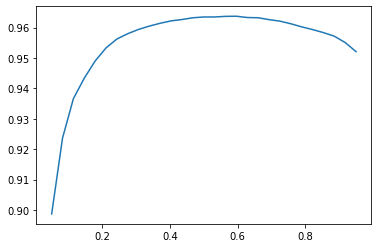

In [ ]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

# Regression

## Preparativos

In [1]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 12.2 MB/s 
     |████████████████████████████████| 186 kB 52.2 MB/s 
     |████████████████████████████████| 1.2 MB 38.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 364 kB/s 


In [2]:
# Primero descargamos los datos
path = untar_data(URLs.BIWI_HEAD_POSE)

In [3]:
# Este paso nunca lo he comentado mucho, pero sirve para guardar los datos de manera temporal
Path.BASE_PATH = path

In [4]:
# Ahora veamos el contenido
## Tenemos dos tipos de archivos (por ahora los que tienen terminacion .obj no nos interesan)
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj')...]

In [5]:
# Ahora veamos el contenido de una de estas carpetas
## En esta se encuentran archivos en su mayoria con extension .jpg y .txt
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt')...]

In [6]:
# Al hacer esto voy a sacar todas las fotos contenidas en la carpeta
img_files = get_image_files(path)

# print(img_files)
# >> [Path('24/frame_00117_rgb.jpg'), Path('24/frame_00263_rgb.jpg'), ...]

# Lo que deberia hacer ahora es ordenar los archivos .txt que contienen las cordenadas
# y hacerlos calzar con como vienen ordenada esta lista de imagenes(para eso es la funcion de abajo)
def img2pose(x): 
  return Path(f'{str(x)[:-7]}pose.txt')

# archivos_txt = [img2pose(img_files[i]) for i in range(len(img_files))]
# print(archivos_txt[:3])
# >> [Path('24/frame_00117_pose.txt'), Path('24/frame_00263_pose.txt'), Path('24/frame_00319_pose.txt')]


img2pose(img_files[0])

Path('24/frame_00117_pose.txt')

In [7]:
# Veamos las dimensiones de una de las imagenes
im = PILImage.create(img_files[0])
im.shape

(480, 640)

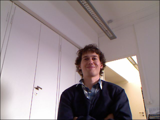

In [8]:
# Asi se ve la imagen
im.to_thumb(160)

In [9]:
# Esta funcion nos permite obtener las posiciones x e y del centro de la cara en cada imagen
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [10]:
# Aqui, por ejemplo nos indica en que parte de la foto se encuentra el centro de la cara
get_ctr(img_files[0])

tensor([383.0029, 241.6483])

In [11]:
# Aqui armamos el datablock
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)])

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


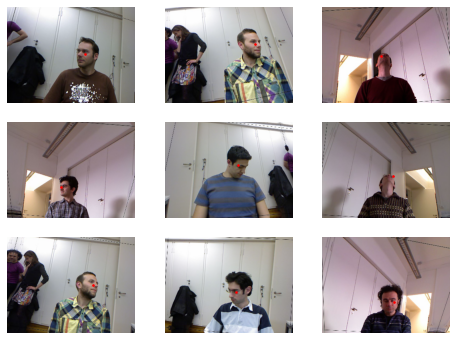

In [12]:
# Ahora carguemos los datos y miremos como estos vienen dado en un mini-batch
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

## **Construyendo el modelo**

In [13]:
# Aqui podemos cargar el modelo, pero antes debemos rescalar las cordenadas
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [14]:
# Esto es lo que hace Fastai cuando utilizamos el y_range
def sigmoid_range(x, lo, hi): 
  return torch.sigmoid(x) * (hi-lo) + lo

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


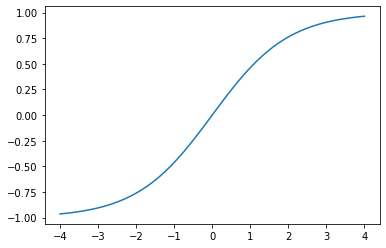

In [15]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4, max=4)

In [16]:
# Aun no hemos especificado la funcion de perdida que vamos a utilizar
# con lo cual, hasta el momento se esta utilizando la que viene por defecto
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.0010000000474974513)

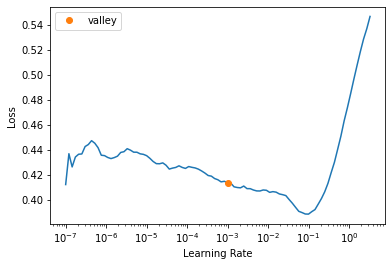

In [17]:
# Tambien y siguiendo lo aprendido de la clase pasada, podemos buscar un buen
# Learning rate con el metodo lr_find()
learn.lr_find()

In [19]:
# Ahora entrenemos un poco el modelo con el lr que nos fue recomendado
lr = 1e-3
learn.fine_tune(3, lr)

epoch,train_loss,valid_loss,time
0,0.212929,0.013043,03:28


epoch,train_loss,valid_loss,time
0,0.073169,0.002798,04:35
1,0.016920,0.003138,04:35
2,0.009065,0.002024,04:35


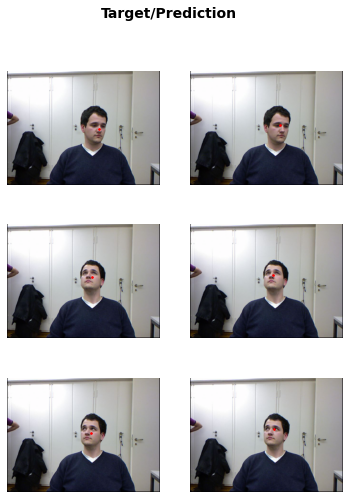

In [21]:
# Veamos algunos de los resultados
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))